_Lambda School Data Science_
# Choose appropriate visualizations

Objectives
- fix misleading visualizations
- use Seaborn to visualize distributions and relationships with continuous and discrete variables

Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Financial Times Visual Vocabulary poster](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Seaborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)


# Upgrade Seaborn

Make sure you have at least version 0.9.0.

On Colab, go to **Restart runtime** after you run the `pip` command.

In [38]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /anaconda2/envs/py3k/lib/python3.7/site-packages (0.9.0)


In [5]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [40]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2019-01-22 17:25:35--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com... 151.101.68.133
Connecting to raw.githubusercontent.com|151.101.68.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258 (1.2K) [text/plain]
Saving to: ‘misleading.py.5’

misleading.py.5     100%[===================>]   1.23K  --.-KB/s    in 0s      

2019-01-22 17:25:36 (27.3 MB/s) - ‘misleading.py.5’ saved [1258/1258]



### Fix misleading plot #1

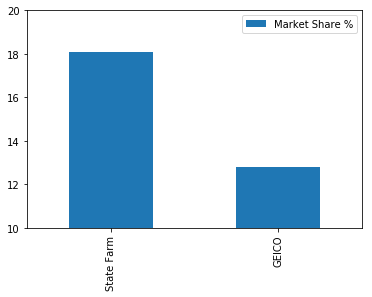

In [41]:
misleading.plot1();

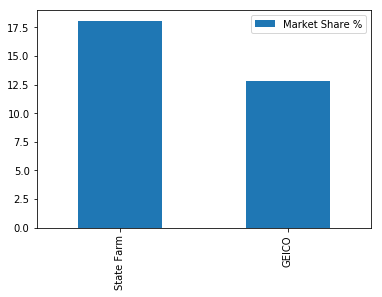

In [42]:
insurance = pd.DataFrame(
    index=['State Farm', 'GEICO'], 
    data={'Market Share %': [18.07, 12.79]})
insurance.plot.bar();

### Fix misleading plot #2

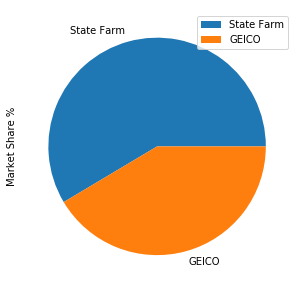

In [43]:
misleading.plot2();

In [44]:
insurance

,Market Share %
State Farm,18.07
GEICO,12.79


In [12]:
other = pd.DataFrame(
    index=['other'], 
    data={'Market Share %': [100 - 18.07 - 12.79]})
insurance = insurance.append(other)
insurance

,Market Share %
State Farm,18.07
GEICO,12.79
other,69.14


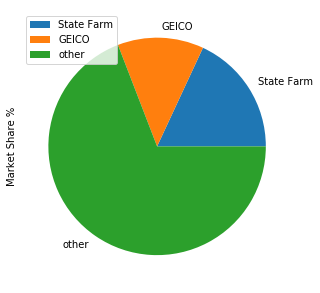

In [13]:
insurance.plot.pie('Market Share %', figsize=(5, 5));

## Fix misleading plot #3

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [25]:
#!pip install -U jupyterlab
import altair as alt
#!pip install -U altair vega_datasets notebook vega
from vega_datasets import data
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [45]:
plot3 = misleading.plot3()

In [27]:
df = pd.read_csv(url)
df.rename(columns = {'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL
0,Alabama,1,768213,282947,3025561
1,Alaska,2,128613,81366,454623
2,Arizona,4,760003,604049,4373055
3,Arkansas,5,454931,96908,1777917
4,California,6,3655463,2091720,25255501


In [28]:
df['State Farm market share %'] = (df['State Farm policy premiums']/ df['STATE TOTAL'])
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL,State Farm market share %
0,Alabama,1,768213,282947,3025561,0.253908
1,Alaska,2,128613,81366,454623,0.282900
2,Arizona,4,760003,604049,4373055,0.173792
3,Arkansas,5,454931,96908,1777917,0.255879
4,California,6,3655463,2091720,25255501,0.144739


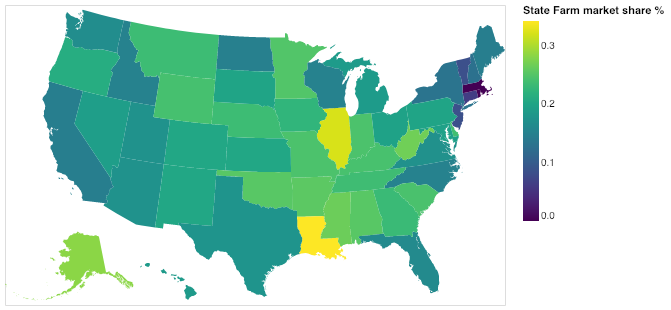

In [46]:
variable = 'State Farm market share %'

states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

## 1. Anscombe dataset

### Load dataset

In [48]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [49]:
df.shape

(44, 3)

### See the data

In [50]:
df.head(5)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [52]:
groups = df.groupby('dataset')

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [53]:
groups.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [54]:
groups.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [55]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [56]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [57]:
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

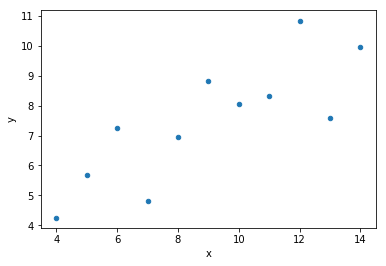

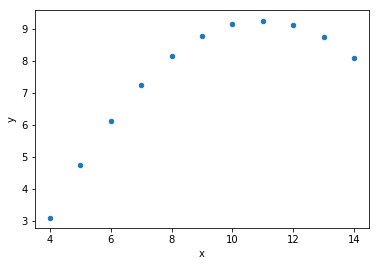

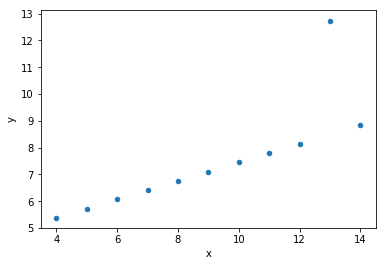

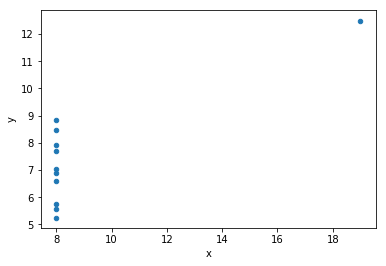

In [58]:
groups.plot('x','y', kind='scatter');

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

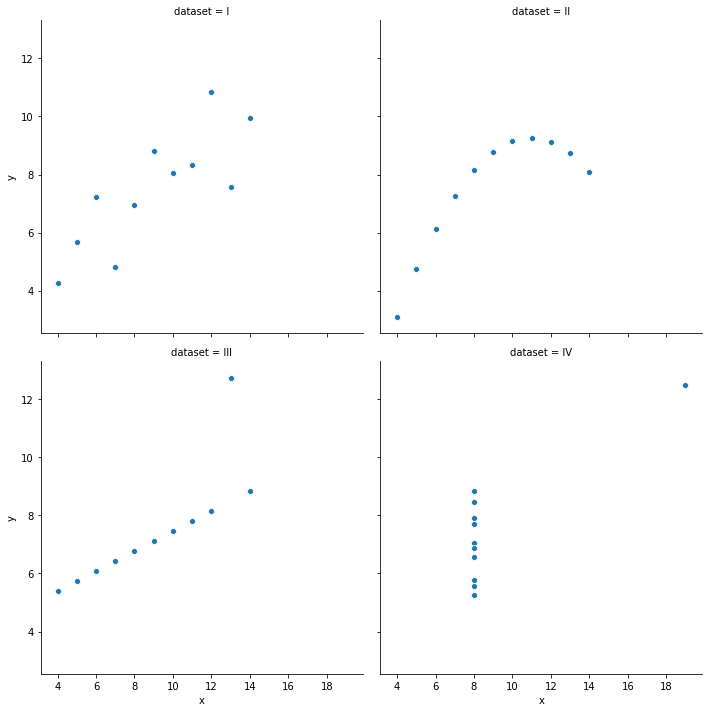

In [60]:
sns.relplot('x','y', col='dataset', data=df, col_wrap=2);

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

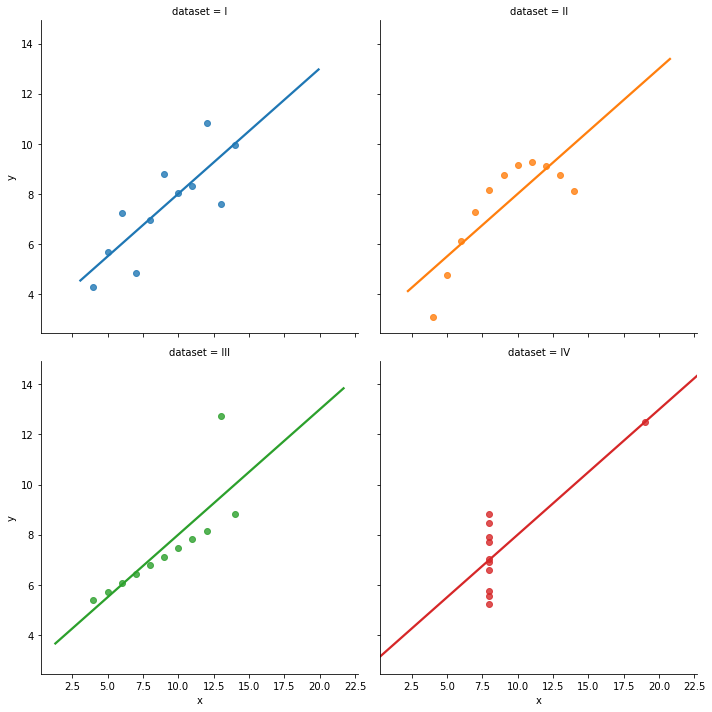

In [62]:
sns.lmplot('x', 'y', col='dataset', hue='dataset', col_wrap=2, ci=None,
          data=df);

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [63]:
tips = sns.load_dataset('tips')

### See the data's shape

In [64]:
tips.shape

(244, 7)

### See the first 5 rows

In [65]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Describe the data

In [66]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [67]:
tips.describe(exclude=np.number)

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

/anaconda2/envs/py3k/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


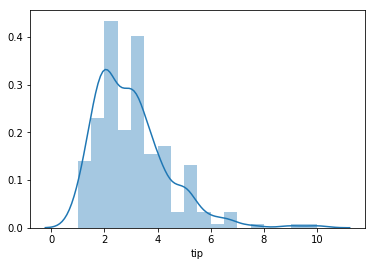

In [68]:
sns.distplot(tips.tip);

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

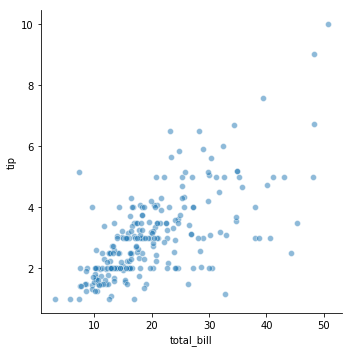

In [70]:
sns.relplot(x='total_bill', y='tip', data=tips, alpha=0.5);

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [71]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

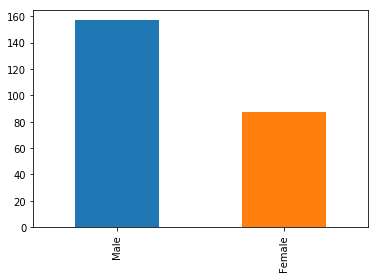

In [73]:
tips.sex.value_counts().plot.bar();

## 3. Flights

### Load dataset

In [75]:
flights = sns.load_dataset('flights')

### See the data's shape

In [76]:
flights.shape

(144, 3)

### See the first 5 rows

In [77]:
flights.head(5)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [78]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### Plot year & passengers

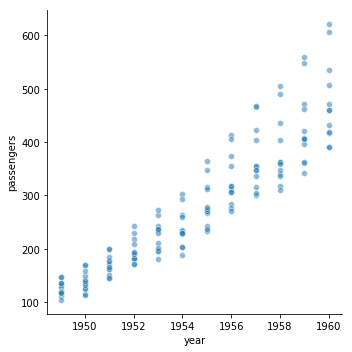

In [79]:
sns.relplot(x='year', y='passengers', data=flights, alpha=0.5);

### Plot month & passengers

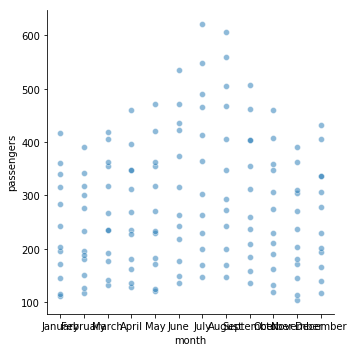

In [80]:
sns.relplot(x='month', y='passengers', data=flights, alpha=0.5);

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [87]:
flight_table = pd.pivot_table(flights, index='year', columns='month', fill_value='passengers')
flight_table

passengers                                                               \
month    January February March April  May June July August September October   
year                                                                            
1949         112      118   132   129  121  135  148    148       136     119   
1950         115      126   141   135  125  149  170    170       158     133   
1951         145      150   178   163  172  178  199    199       184     162   
1952         171      180   193   181  183  218  230    242       209     191   
1953         196      196   236   235  229  243  264    272       237     211   
1954         204      188   235   227  234  264  302    293       259     229   
1955         242      233   267   269  270  315  364    347       312     274   
1956         284      277   317   313  318  374  413    405       355     306   
1957         315      301   356   348  355  422  465    467       404     347   
1958         340      318   362   348  363  435  491    505       404     359   
1959         360      342   406   396  420  472  548    559       463     407   
1960         417      391   419   461  472  535  622    606       508     461   

                         
month November December  
year                     
1949       104      118  
1950       114      140  
1951       146      166  
1952       172      194  
1953       180      201  
1954       203      229  
1955       237      278  
1956       271      306  
1957       305      336  
1958       310      337  
1959       362      405  
1960       390      432

### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

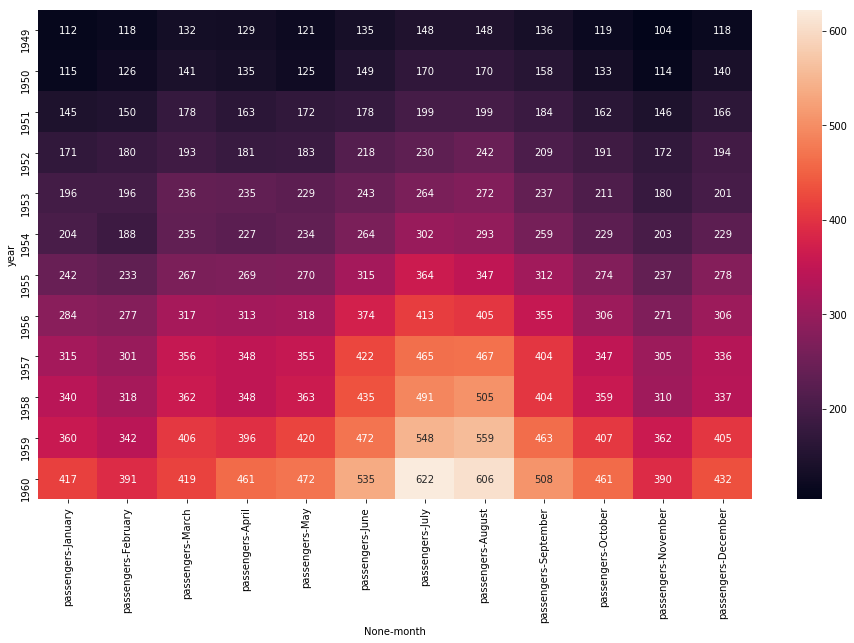

In [90]:
plt.figure(figsize=(16, 9))
sns.heatmap(flight_table, annot=True, fmt='d');

# ASSIGNMENT

### 1.

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

### 2.

Choose a chart you want to make, from [FT's Visual Vocabulary poster](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) Experiment and make changes.

Take notes. Share your work with your cohort!


In [102]:
#!pip install rarfile
#import rarfile
#import io
#import requests
#rarurl = "https://archive.ics.uci.edu/ml/machine-learning-databases/00281/Qualitative_Bankruptcy%20(250%20instances).rar"
#s = requests.get(rarurl).content
#rf = rarfile.RarFile(rarurl)
#df_bankruptcy = pd.read_rar('https://archive.ics.uci.edu/ml/machine-learning-databases/00281/Qualitative_Bankruptcy%20(250%20instances).rar')